In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2

/tmp/ipykernel_44623/89438716.py:15: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


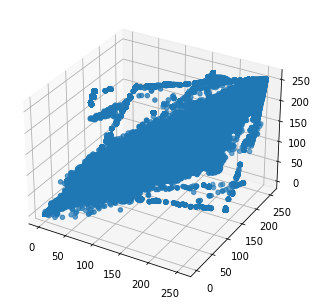

In [3]:
#read image
img = cv2.imread('image.png')

#convert from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#get rgb values from image to 1D array
r, g, b = cv2.split(img)
r = r.flatten()
g = g.flatten()
b = b.flatten()

#plotting 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

[[ 62  61  77]
 [179 168 171]
 [ 95 100 110]
 [249 249 250]
 [151 144 151]
 [185 127 128]
 [ 12  12  13]
 [205 201 203]
 [ 63 132 233]
 [134 118 124]]


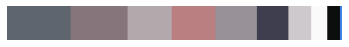

In [3]:
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

class DominantColors:

    CLUSTERS = None
    IMAGE = None
    COLORS = None
    LABELS = None
    
    def __init__(self, image, clusters=3):
        self.CLUSTERS = clusters
        self.IMAGE = image
        
    def dominantColors(self):
    
        #read image
        img = cv2.imread(self.IMAGE)
        
        #convert to rgb from bgr
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                
        #reshaping to a list of pixels
        img = img.reshape((img.shape[0] * img.shape[1], 3))
        
        #save image after operations
        self.IMAGE = img
        
        #using k-means to cluster pixels
        kmeans = KMeans(n_clusters = self.CLUSTERS)
        kmeans.fit(img)
        
        #the cluster centers are our dominant colors.
        self.COLORS = kmeans.cluster_centers_
        
        #save labels
        self.LABELS = kmeans.labels_
        
        #returning after converting to integer from float
        return self.COLORS.astype(int)

    def rgb_to_hex(self, rgb):
        return '#%02x%02x%02x' % (int(rgb[0]), int(rgb[1]), int(rgb[2]))
    
    def plotClusters(self):
        #plotting 
        fig = plt.figure()
        ax = Axes3D(fig)        
        for label, pix in zip(self.LABELS, self.IMAGE):
            ax.scatter(pix[0], pix[1], pix[2], color = self.rgb_to_hex(self.COLORS[label]))
        plt.show()
        
    
    def plotHistogram(self):
       
        #labels form 0 to no. of clusters
        numLabels = np.arange(0, self.CLUSTERS+1)
       
        #create frequency count tables    
        (hist, _) = np.histogram(self.LABELS, bins = numLabels)
        hist = hist.astype("float")
        hist /= hist.sum()
        
        #appending frequencies to cluster centers
        colors = self.COLORS
        
        #descending order sorting as per frequency count
        colors = colors[(-hist).argsort()]
        hist = hist[(-hist).argsort()] 
        
        #creating empty chart
        chart = np.zeros((50, 500, 3), np.uint8)
        start = 0
        
        #creating color rectangles
        for i in range(self.CLUSTERS):
            end = start + hist[i] * 500
            
            #getting rgb values
            r = colors[i][0]
            g = colors[i][1]
            b = colors[i][2]
            
            #using cv2.rectangle to plot colors
            cv2.rectangle(chart, (int(start), 0), (int(end), 50), (r,g,b), -1)
            start = end	
        
        #display chart
        plt.figure()
        plt.axis("off")
        plt.imshow(chart)
        plt.show()
        
img = 'image.png'
clusters = 10
dc = DominantColors(img, clusters) 
colors = dc.dominantColors()
print(colors)
dc.plotHistogram()

In [5]:
colors

array([[ 62,  61,  77],
       [179, 168, 171],
       [ 95, 100, 110],
       [249, 249, 250],
       [151, 144, 151],
       [185, 127, 128],
       [ 12,  12,  13],
       [205, 201, 203],
       [ 63, 132, 233],
       [134, 118, 124]])

In [14]:
def color_quantization(image, K):
# Defining input data for clustering
    data = np.float32(image).reshape((-1, 3))
# Defining criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0)
# Applying cv2.kmeans function
    ret, label, center = cv2.kmeans(data, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(image.shape)
    return result

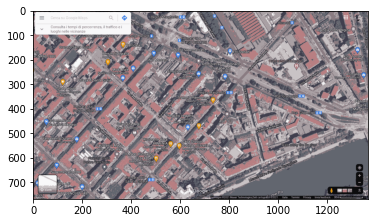

In [28]:
color_3 = color_quantization(cv2.imread('image.png'), 10)
b,g,r = cv2.split(color_3)
frame_rgb = cv2.merge((r,g,b))
plt.imshow(frame_rgb)

In [39]:
cv2.imwrite('città_quantizzata.jpg', cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2BGR))

True

In [13]:
from sklearn.cluster import KMeans
import numpy as np

img=cv2.imread('image.png')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=img.reshape((img.shape[1]*img.shape[0],3))

md=[]
for i in range(1,21):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(img)
    o=kmeans.inertia_
    md.append(o)
print(md)
plt.plot(list(np.arange(1,21)),md)
plt.show()

[8498172813.08915, 3940634204.297201, 2343045441.300485, 1533226169.7126596, 1148759409.7452004, 922624529.6179676, 777610811.0433918, 642141594.2620882, 573731174.1270036, 512207895.29948956, 461992107.51410043, 424397095.3356621, 387754448.06290483, 359427098.001689, 323344415.1319652, 298592555.8992019, 283222725.8139198, 268840484.3971122, 256912429.80747023, 246744427.11506885]


NameError: name 'np' is not defined